# HW2 Python Solutions

## Problem 2: Coherent States of the Quantum Harmonic Oscillator (QHO)

- We want to study coherent states of the quantum harmonic oscillator (QHO) and assume the system has the initial wavefunction psi(x, 0) = phi_0(x - x_0), where x_0 is a constant representing the displacement of the Gaussian ground-state waveform from the origin.

- We need to:

  - **(a)** Plot the wavefunction by choosing x_0 = sqrt(hbar * m * omega).  
  - **(b)** Calculate the overlap integrals (c_n = <n|psi(0)>) necessary to express the initial wavefunction in terms of energy eigenstates. We will do this for the first 10 energy levels. Compare the results to:

    c_0 = (alpha^n / sqrt(n!)) * exp(-alpha^2 / 2)

    where alpha = x_0 * sqrt(m * omega / (2 * hbar)). Check whether the first 10 terms are enough to properly represent the wavefunction and explain.

  - **(c)** Calculate the expectation value of energy.
  
  - **(d)** Construct the time-dependent wavefunction, animate thefunctiontion, and describe its time evolution.
  
  - **(e)** Writefunctiontions to generalize the solution: As x_0 = 4 * sqrt(hbar * m * omega) given hint we may need to use more than 10 terms.


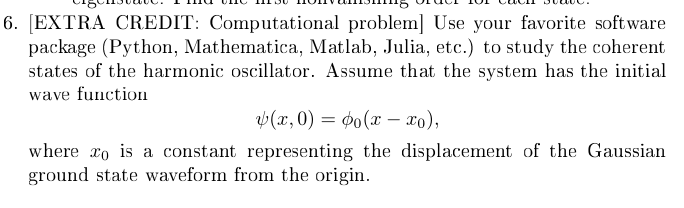

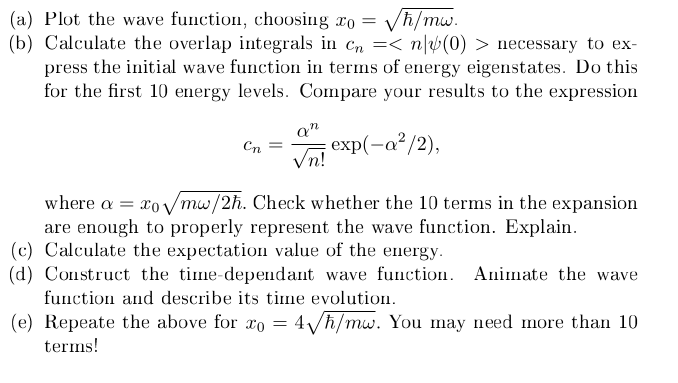

In [6]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.special import hermite, factorial, eval_hermite
import matplotlib.style as style
style.use('dark_background')
plt.rcParams['text.usetex'] = False


#display screenshots
for i in range(1, 3):
    display(Image(filename=f'p_statement/p6_{i}.png'))

In [7]:
def initial_wavefunction(x, x_0, m, omega, hbar):
    '''
    calculate the initial wavefunction psi(x, 0) for a coherent state.
    args:
        x (array): position values
        x_0 (float): displacement of the gaussian ground-state from the origin
        m (float): mass of the particle
        omega (float): angular frequency
        hbar (float): reduced planck constant
    returns:
        psi (array): computed wavefunction values
    '''
    alpha = np.sqrt(m * omega / hbar)
    norm = alpha / np.pi**0.25
    return norm * np.exp(-0.5 * alpha**2 * (x - x_0)**2)


def plot_wavefunction(x, wavefunction, x_0, m, omega, hbar, save_as_png=False, file_name=None):
    '''
    plot the wavefunction as a function of x.
    args:
        x (array): x values for plotting
        wavefunction (array): computed coherent state wavefunction
        x_0 (float): displacement used in the coherent state
        m (float): mass of the particle
        omega (float): angular frequency
        hbar (float): reduced planck constant
        save_as_png (bool): if true, saves the plot as a png file
        file_name (str): file name for saving the png
    returns:
        none
    '''
    #compute the ground state wavefunction (unshifted)
    psi_ground = initial_wavefunction(x, 0, m, omega, hbar)
    
    plt.figure(figsize=(8, 5))
    plt.plot(x, wavefunction, label=f'coherent state: x0 = {x_0}', color='b')
    plt.plot(x, psi_ground, 'r--', label='ground state gaussian')
    plt.xlabel('x')
    plt.ylabel('psi(x, 0)')
    plt.title('initial wavefunction of the coherent state')
    plt.legend()
    plt.grid(True)
    
    if save_as_png and file_name:
        plt.savefig(file_name, format='png')
        print(f'plot saved as {file_name}')
    else:
        plt.show()




def overlap_integrals(n_max, x, x_0, m, omega, hbar):
    '''
    compute the overlap integrals c_n = integral[ psi_n(x)*psi_coherent(x,0) dx ]
    for n = 0 to n_max - 1.
    args:
        n_max (int): number of energy levels to compute
        x (array): position values for integration
        x_0 (float): displacement used for the coherent state
        m, omega, hbar: parameters of the harmonic oscillator
    returns:
        array of coefficients c_n
    '''
    psi_coherent = initial_wavefunction(x, x_0, m, omega, hbar)
    c_n = []
    for n in range(n_max):
        psi_n_vals = psi_n(n, x, m, omega, hbar)
        # compute the integral using the trapezoidal rule
        cn = np.trapezoid(psi_n_vals * psi_coherent, x)
        c_n.append(cn)
    return np.array(c_n)

def analytic_coefficients(n_max, x_0, m, omega, hbar):
    '''
    compute the analytic expansion coefficients for a coherent state.
    the analytic expression is:
      c_n = exp(-alpha^2/2) * (alpha^n / sqrt(n!))
    where alpha = x_0 * sqrt(m * omega/(2 * hbar))
    args:
        n_max (int): number of coefficients to compute (for n=0 to n_max-1)
        x_0 (float): displacement of the coherent state
        m, omega, hbar: oscillator parameters
    returns:
        array of analytic coefficients c_n
    '''
    alpha = x_0 * np.sqrt(m * omega/(2 * hbar))
    c_n = []
    for n in range(n_max):
        cn = np.exp(-0.5 * alpha**2) * (alpha**n/np.sqrt(factorial(n)))
        c_n.append(cn)
    return np.array(c_n)

#function to compute expectation value of energy
def expectation_value_energy(c_n, energy_levels):
    """
    compute the expectation value of energy for the coherent state.
    Args: c_n (array), energy_levels (array)
    Returns: E (float)
    """

#function to construct time-dependent wavefunction
def time_dependent_wavefunction(x, t, c_n, omega, hbar):
    """
    construct the time-dependent wavefunction psi(x, t).
    Args: x (array), t (float), c_n (array), omega (float), hbar (float)
    Returns: psi_t (array)
    """

#function to animate the wavefunction
def animate_wavefunction(x, time_steps, c_n, omega, hbar):
    """
    animate the time evolution of the wavefunction.
    Args: x (array), time_steps (array), c_n (array), omega (float), hbar (float)
    Returns: None
    """

#function to generalize for different x_0 and calculate more terms
def generalized_wavefunction(x_0, n_max, m, omega, hbar):
    """
    generalize wavefunction for different x_0 and n_max values.
    Args: x_0 (float), n_max (int), m (float), omega (float), hbar (float)
    Returns: wavefunction (array)
    """

#function to compute the nth hermite poly
def hermite_polynomial(n, x):
    """
    compute the Hermite polynomial H_n(x).
    Args: n (int), x (array)
    Returns: H_n (array)
    """

#get the first n_max energy level
def energy_levels(n_max, hbar, omega):
    """
    Compute the first n_max energy levels.
    Args: n_max (int), hbar (float), omega (float)
    Returns: energy_levels (array)
    """

#function to check normaliztion = 1 for validity
def check_normalization(c_n):
    '''
    check if the sum of the squared magnitudes of the coefficients is approximately 1.
    args:
        c_n (array): expansion coefficients
    returns:
        the sum of |c_n|^2
    '''
    norm = np.sum(np.abs(c_n)**2)
    return norm

def psi_n(n, x, m, omega, hbar):
    '''
    compute the nth eigenfunction of the quantum harmonic oscillator.
    the eigenfunctions are given by:
      psi_n(x) = (1/sqrt(2^n * n!)) * (m * omega/(pi * hbar))^(1/4)
                 * H_n(sqrt(m * omega/hbar)*x) * exp(-m * omega * x^2/(2 * hbar))
    args:
        n (int): energy level index
        x (array): position values
        m (float): mass of the particle
        omega (float): angular frequency
        hbar (float): reduced planck constant
    returns:
        array of eigenfunction values at positions x
    '''
    norm = 1.0/np.sqrt((2**n)*factorial(n))
    prefactor = (m*omega/(np.pi*hbar))**0.25
    xi = np.sqrt(m*omega/hbar)*x
    return norm * prefactor * eval_hermite(n, xi) * np.exp(-0.5*(m*omega/hbar)*x**2)

def compute_overlap(x0, n_max, m, omega, hbar): #part b
    #space for numerical intg
    x = np.linspace(-10, 10, 2000)

    #compute numerical overlap
    c_n_numerical = overlap_integrals(n_max, x, x0, m, omega, hbar)

    #known formula
    c_n_analytic = analytic_coefficients(n_max, x0, m, omega, hbar)

    print('n\tnumerical\tanalytic')
    for n in range(n_max):
        print(f'{n}\t{c_n_numerical[n]:.5f}\t\t{c_n_analytic[n]:.5f}')

    #check norm
    norm_numerical = check_normalization(c_n_numerical)
    norm_analytic = check_normalization(c_n_analytic)
    print(f'\nnumerical normalization sum: {norm_numerical:.5f}')
    print(f'analytic normalization sum: {norm_analytic:.5f}')

    #ximpld plt for verification 
    plt.figure(figsize=(8, 5))
    plt.plot(range(n_max), np.abs(c_n_numerical)**2, 'bo-', label='numerical |c_n|^2')
    plt.plot(range(n_max), np.abs(c_n_analytic)**2, 'r--', label='analytic |c_n|^2')
    plt.xlabel('n (energy level index)')
    plt.ylabel('|c_n|^2')
    plt.title('Overlap coefficient squared for the first 10 energy levels')
    plt.legend()
    plt.grid(True)
    plt.savefig('part_b_x0.png')
    plt.show()


### Part a: where x_0 = sqrt(hbar * m * omega)

Here we want to construct the intial wavefunction for a given coherent state of QHO. to do so we just increment it by a displacement x_0, i've showed both. As for the physics explain.

#### Ground State Wavefunction

- we know ground state for gaussian of QHO is typically
  
  psi0(x) = (normalization constant) * exp( - (m * omega / (2 * hbar)) * x^2 )
  
- we simplify by adding param alpha defined as

  alpha = sqrt(m * omega / hbar)

- this pretty much sets width of gaussian and fluctuates like:
  - larger m or omega givens a larger alpha (making the gaussian narrower)
  - larger hbar results in a smaller alpha (which widens the gaussian)

- when included our groundstate psi becomes:

  psi0(x) = (alpha / (pi^(1/4))) * exp( -0.5 * alpha^2 * x^2 )

#### Coherent State Wavefunction

- from class a coherent state is formed by displacing the ground state wavefunction by x_0
- thus the initial coherent state wavefunction is:

  psi(x, 0) = psi0(x - x_0)

  this means we replace x in the ground state with (x - x_0) which effectivley just shifts where the gaussian is centered(x_0 instead of 0)

- for part a.1, we choose:

  x_0 = sqrt(hbar * m * omega)

plot saved as part_a_x0.png


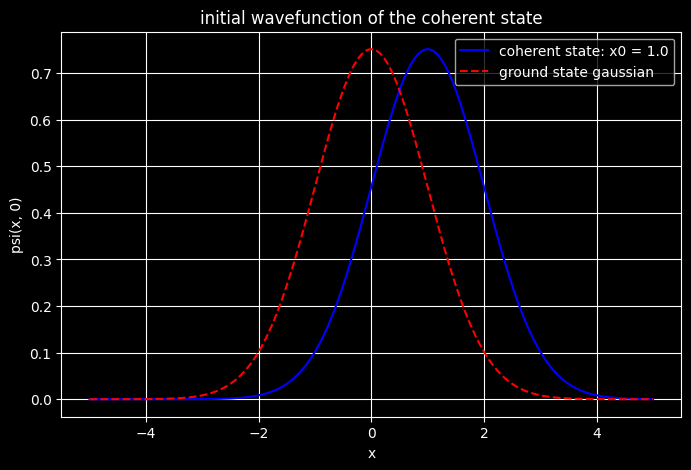

In [8]:
#part a.1
m = 1
omega = 1
hbar = 1.0
#for part a: x0 = sqrt(hbar * m * omega)
x_0 = np.sqrt(hbar * m * omega)
# create x values
x = np.linspace(-5, 5, 500)
# compute coherent state wavefunction
psi = initial_wavefunction(x, x_0, m, omega, hbar)
plot_wavefunction(x, psi, x_0, m, omega, hbar, save_as_png=True, file_name=r'part_a_x0.png')

###part b: asked to calculate overlap integral

we know that any state can be expressed as a sum over the energy eigenstates c_n. in this case for QHO the intial state (gaussian) can be expanded as:

  psi(x, 0) = sum (n = 0 to infinity) [ c_n * psi_n(x) ]

and we know psi_n(x) are eigenfunction and we can find c_n given by:

  c_n = ∫ [ psi_n*(x) * psi(x, 0) ] dx ... (1) mcyintyre ch 9

#### for its eigenstates

we know eigen states:

  psi_n(x) = (1/sqrt(2^n * n!)) * (m*omega/(pi*hbar))^(1/4) * H_n(xi) * exp( -xi²/2 )

where xi = sqrt(m*omega/hbar) * x and H_n(xi)

#### for a given coherent state we can say:

  c_n = exp( -alpha² / 2 ) * (alpha^n / sqrt(n!) )

again, alpha is:

  alpha = x_0 * sqrt( m * omega / (2 * hbar) )

and this is a poisson distro and thus we can say:
- at small alpha most weight is in ground state
- larger alpha, higher energy levels contribute more

#### from this we take:

- any quantum state can be expressed as a linear combo of complete sets of eigenstates. here psi(x,0) is written in basis of QHO.

- a given coherent state is just a displaced version (by x_0) of ground state that is the 'maximially uncertainity' (hbar/2 square box in phase space as shown in class)
   - its expansion coefficients follow poisson distro
  
- I believe the alpha param shows the displacement in phase space.
   -average number of quanta present in the state and thus will influence our distribtion via expansion coefficients
  
- For solving this problem:
  -I'll calculate overlap integrals numerically and compare them to analytical result.
  -I'll also check the norm of the sum of C_n **2 which should give us a hint if the first 10 are enough.

n	numerical	analytic
0	0.77880		0.77880
1	0.55070		0.55070
2	0.27535		0.27535
3	0.11241		0.11241
4	0.03974		0.03974
5	0.01257		0.01257
6	0.00363		0.00363
7	0.00097		0.00097
8	0.00024		0.00024
9	0.00006		0.00006

numerical normalization sum: 1.00000
analytic normalization sum: 1.00000


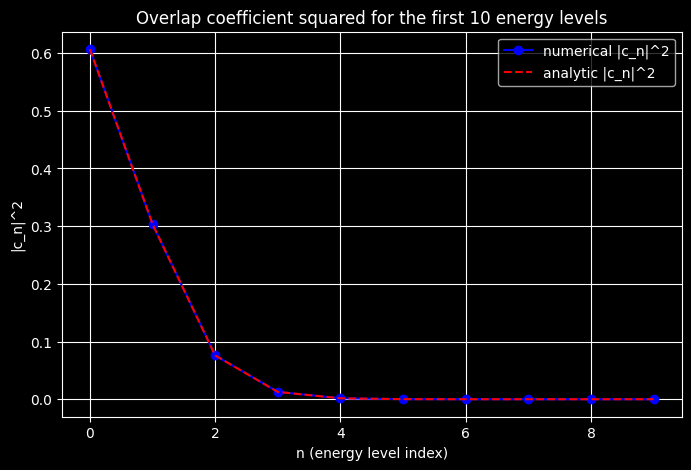

In [13]:
#part b
x_0 = np.sqrt(hbar * m * omega)  #b.1 (first x_0)
n_max = 10
compute_overlap(x_0, n_max, m, omega, hbar)
